In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfD= pd.read_csv("CBS_2021-2023_Daily_Weather.csv")

In [3]:
dfD.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [4]:
dfD.columns

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)'],
      dtype='object')

In [5]:
dfD = dfD.rename(columns={'weathercode (wmo code)':'weather',
                       'apparent_temperature_mean (°C)':'Apparenttemp',
                       'temperature_2m_mean (°C)':'Temp',
                       'windspeed_10m_max (km/h)':'Windspeed',
                       'Day_of_Week':'Weekdays'})
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [6]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Casual        1095 non-null   int64  
 1   Date          1095 non-null   object 
 2   Member        1095 non-null   int64  
 3   Total_rides   1095 non-null   int64  
 4   Apparenttemp  1095 non-null   float64
 5   Temp          1095 non-null   float64
 6   weather       1095 non-null   int64  
 7   Windspeed     1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [7]:
dfD = dfD.fillna(0)  # Replace missing values with 0 (adjust as needed)

In [8]:
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [9]:
# Convert the 'Date' column to datetime format
dfD['Date'] = pd.to_datetime(dfD['Date'])

# Extract Month and Year from the 'Date' column
dfD['Month'] = dfD['Date'].dt.month
dfD['Year'] = dfD['Date'].dt.year

dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021


In [10]:
# Add a new column with an index as a counting number
dfD['Count'] = dfD.index

dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4


In [ ]:
plt.figure(figsize=(15, 6))


sns.barplot(x="Weekdays", y="user_count", hue="user_type", data=daily_user_type, palette="muted")
plt.ylabel(None)
plt.xlabel(None)
plt.title("Comparison of Number of Casual Users and Registered Users by Day")
casual_patch = mpatches.Patch(color=sns.color_palette("muted")[0], label='Casual User')
registered_patch = mpatches.Patch(color=sns.color_palette("muted")[1], label='Registered User')
plt.legend(handles=[casual_patch, registered_patch], title="User Type")
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="casual_user", y="day", data= Casual, palette=colors, hue="day", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="registered_user", y="day", data=Member, hue="day", legend=False, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Number of Casual Users and Registered Users by Day", fontsize=20)
plt.show()

In [11]:
# Month= {1: 'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul',
#                 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# dfD['Month'] = dfD['Month'].map(Month)
# dfD.head(5)

In [12]:
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4


[Text(0.5, 1.0, 'Total bike Rides during Month')]

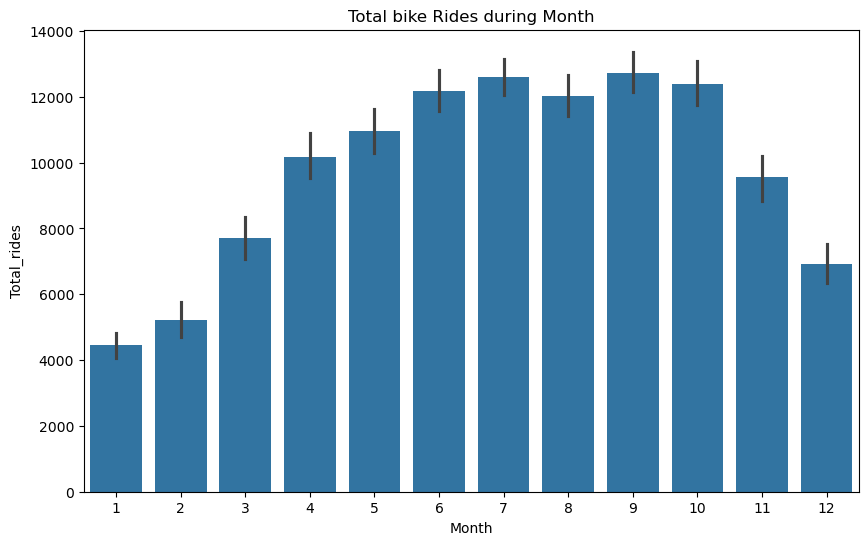

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=dfD, x='Month', y='Total_rides', ax=ax)
ax.set(title='Total bike Rides during Month')

In [14]:
dfD.apply(lambda x: len(x.unique()))

Casual          1010
Date            1095
Member          1034
Total_rides     1042
Apparenttemp     398
Temp             350
weather           13
Windspeed        239
Month             12
Year               3
Count           1095
dtype: int64

In [15]:
# 2. Convert Date to datetime format
dfD['Date'] = pd.to_datetime(dfD['Date'])

In [16]:
# 3. Extract Day of Week
dfD['Weekdays'] = dfD['Date'].dt.dayofweek


[Text(0.5, 1.0, 'Total bike Rides during Month')]

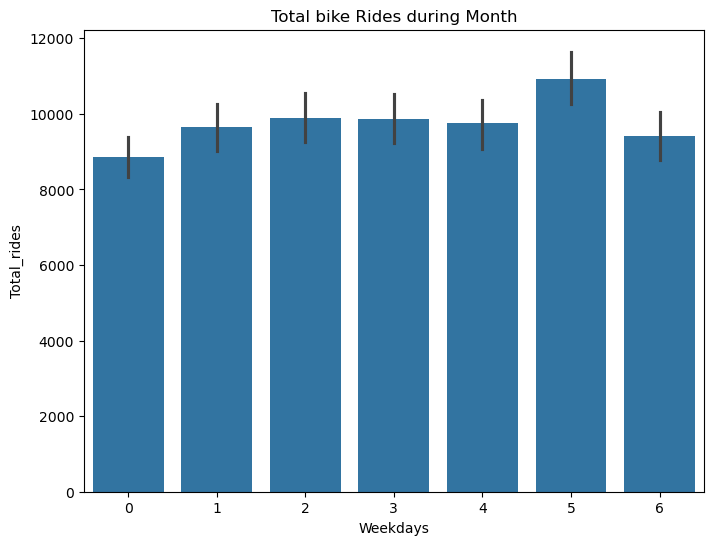

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfD, x='Weekdays', y='Total_rides', ax=ax)
ax.set(title='Total bike Rides during Month')

In [18]:
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,1


In [19]:
dfD

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,12,2023,1090,2
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,12,2023,1091,3
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,12,2023,1092,4
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,12,2023,1093,5


In [20]:
dfD_change = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

dfD['Weekays'] = dfD['Weekdays'].map(dfD_change)

In [21]:
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,Weekays
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,Friday
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,Saturday
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,Sunday
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0,Monday
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,1,Tuesday


In [22]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfD['Season'] = dfD['Month'].apply(get_season)
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,Weekays,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,Friday,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,Saturday,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,Sunday,Winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0,Monday,Winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,1,Tuesday,Winter


In [23]:
dfD.isnull().sum()

Casual          0
Date            0
Member          0
Total_rides     0
Apparenttemp    0
Temp            0
weather         0
Windspeed       0
Month           0
Year            0
Count           0
Weekdays        0
Weekays         0
Season          0
dtype: int64

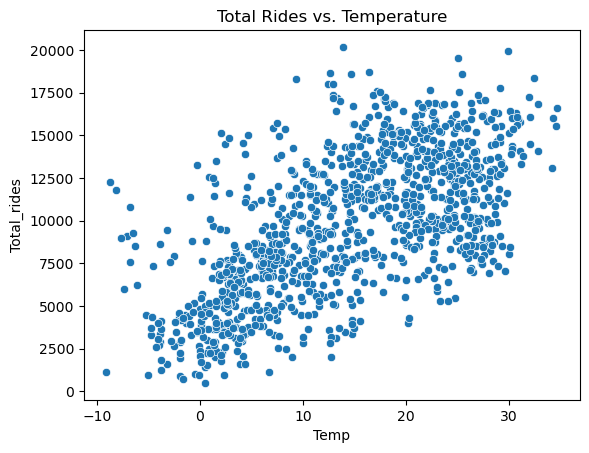

In [24]:

# Scatter plot: Total_rides vs. temperature_2m_mean
sns.scatterplot(x='Temp', y='Total_rides', data=dfD)
plt.title('Total Rides vs. Temperature')
plt.show()

<Figure size 640x480 with 0 Axes>

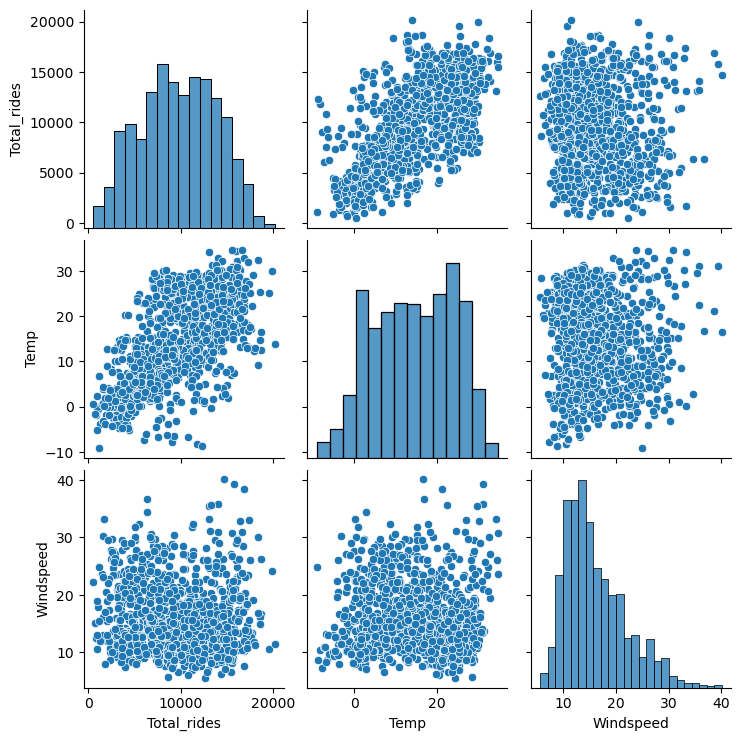

In [25]:
# Pair plot: Visualize relationships between multiple features
plot = plt.figure(figure = (8,8))
sns.pairplot(dfD[['Total_rides', 'Temp', 'Windspeed']])
plt.show()

In [26]:
dfD.columns

Index(['Casual', 'Date', 'Member', 'Total_rides', 'Apparenttemp', 'Temp',
       'weather', 'Windspeed', 'Month', 'Year', 'Count', 'Weekdays', 'Weekays',
       'Season'],
      dtype='object')

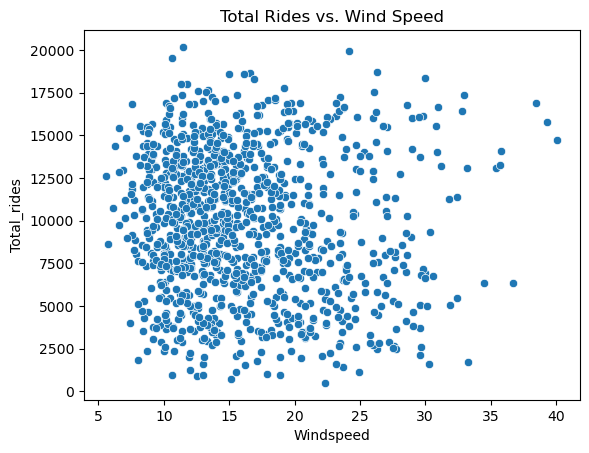

In [27]:
# Scatter plot: Total_rides vs. windspeed_10m_max
sns.scatterplot(x='Windspeed', y='Total_rides', data=dfD)
plt.title('Total Rides vs. Wind Speed')
plt.show()

<Axes: xlabel='weather', ylabel='Total_rides'>

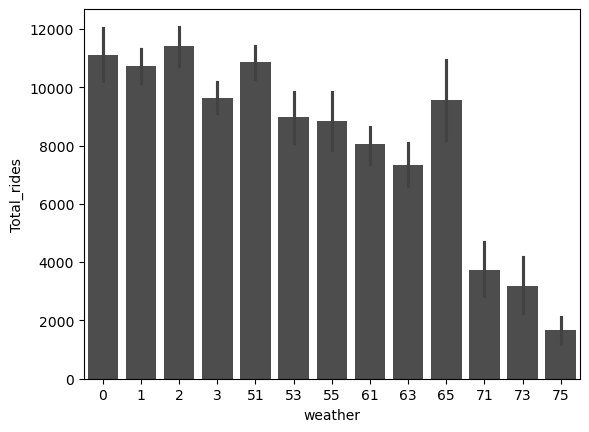

In [28]:
plot = plt.figure(figure = (5,5))
sns.barplot(x = 'weather', y= 'Total_rides', data= dfD, color='.3')

[Text(0.5, 1.0, 'Count of bikes during different days')]

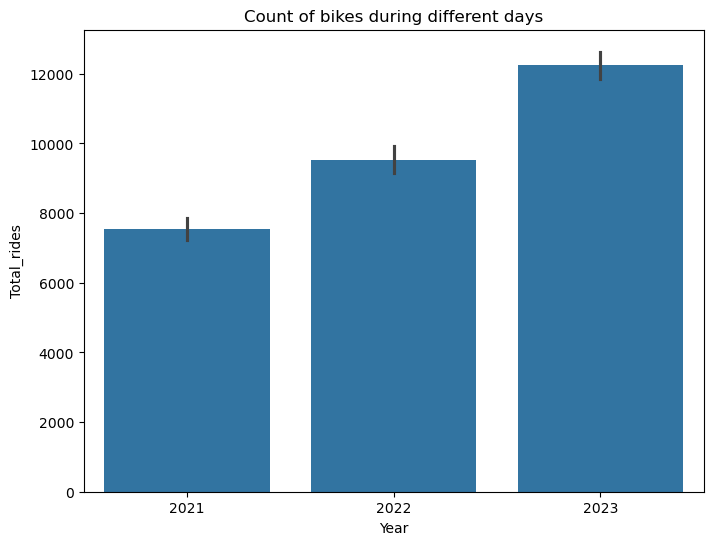

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfD, x='Year', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during different days')

[Text(0.5, 1.0, 'Total bike Rides during Month')]

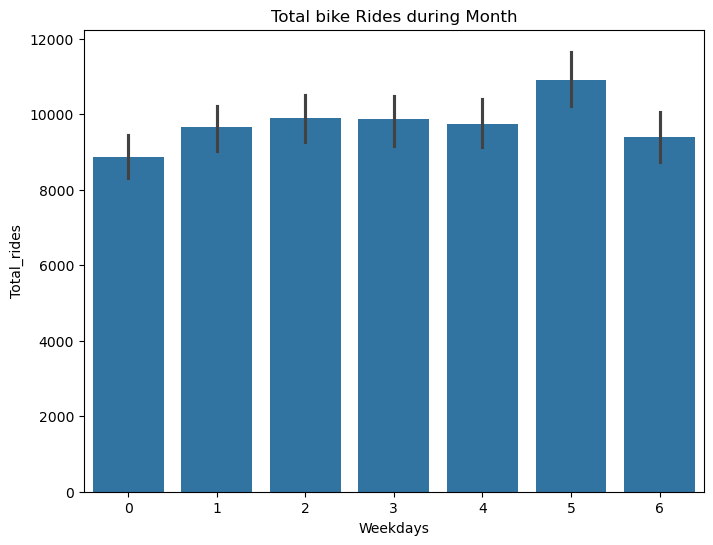

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfD, x='Weekdays', y='Total_rides', ax=ax)
ax.set(title='Total bike Rides during Month')

[Text(0.5, 1.0, 'Total bike Rides in Season')]

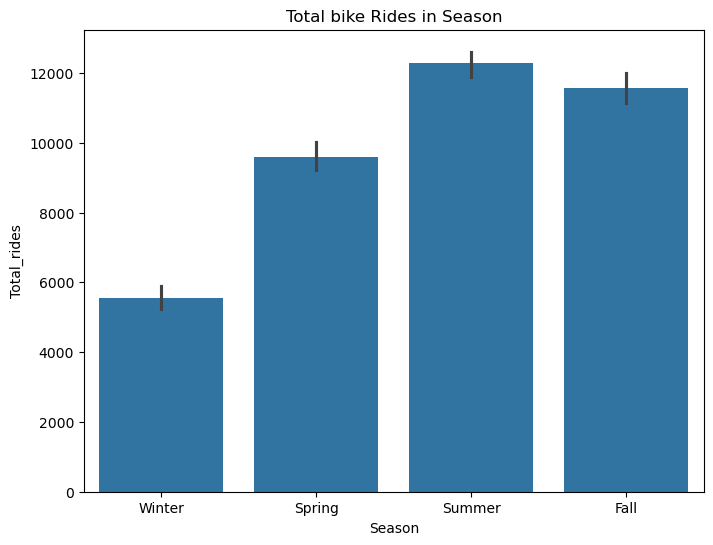

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfD, x='Season', y='Total_rides', ax=ax)
ax.set(title='Total bike Rides in Season')

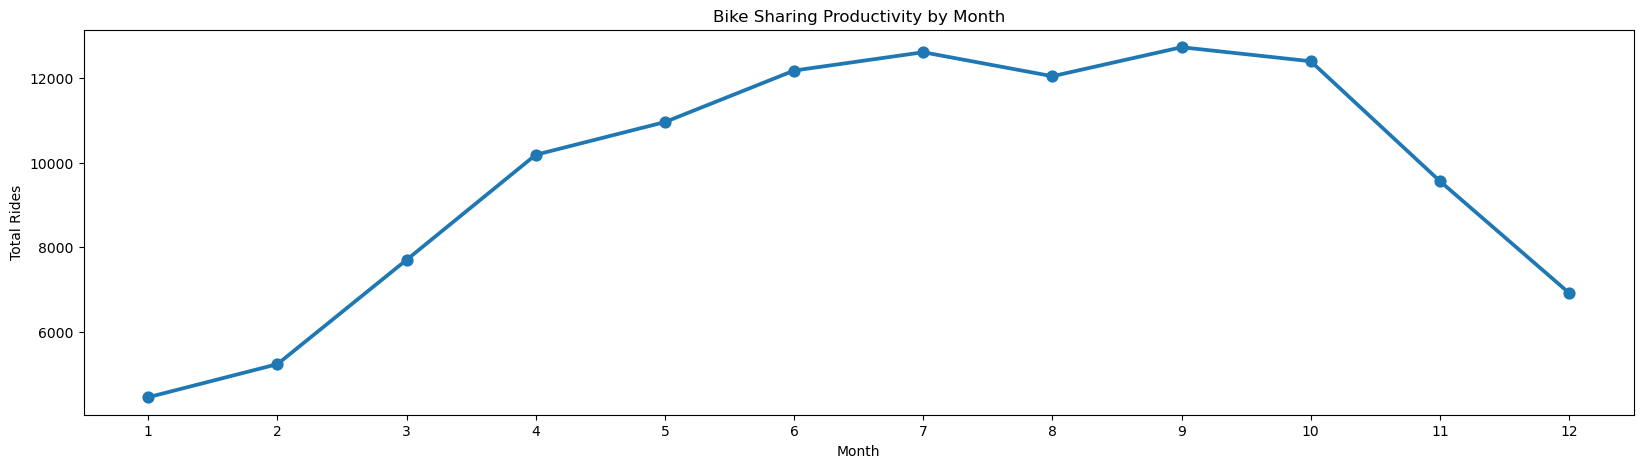

In [32]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=dfD, x='Month', y='Total_rides', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity by Month')
ax.set_ylabel('Total Rides')
ax.set_xlabel('Month')
plt.show()

In [33]:
dfD.head(4)

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,Weekays,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,Friday,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,Saturday,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,Sunday,Winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0,Monday,Winter


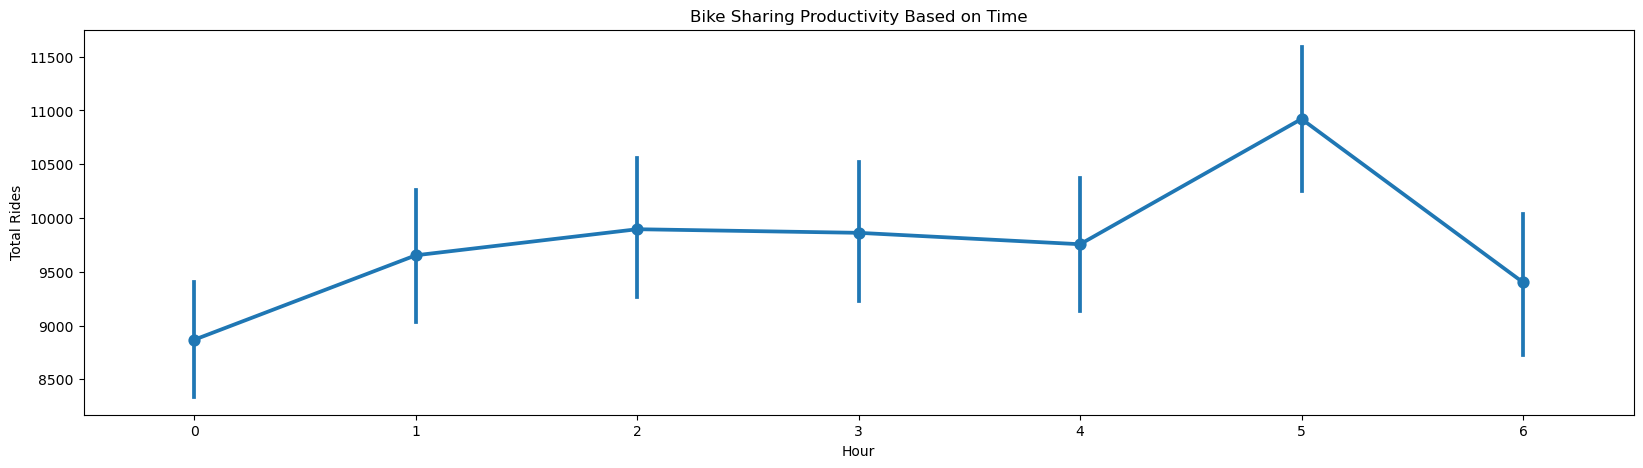

In [34]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=dfD, x='Weekdays', y='Total_rides', ax=ax)
ax.set(title='Bike Sharing Productivity Based on Time')
ax.set_ylabel('Total Rides')
ax.set_xlabel('Hour')
plt.show()